Phần 1: Mô tả và khảo sát phân phối cho biến T1
Mô tả độ tập trung và phân tán của dữ liệu T1:

In [1]:
import pandas as pd

# Giả sử T1 là một cột trong dataframe
df = pd.DataFrame({'T1': [2400, 2600, 2800, 3000, 3200, 3400, 3600, 3800, 4000, 4200, 5000, 5200, 6000, 7200, 8000, 9000]})

# Tính các thống kê cơ bản
stats = df['T1'].describe(percentiles=[0.25, 0.5, 0.75])
print(stats)


count      16.000000
mean     4587.500000
std      2005.949484
min      2400.000000
25%      3150.000000
50%      3900.000000
75%      5400.000000
max      9000.000000
Name: T1, dtype: float64


2 Vẽ biểu đồ Box-Plot và xác định các đại lượng:

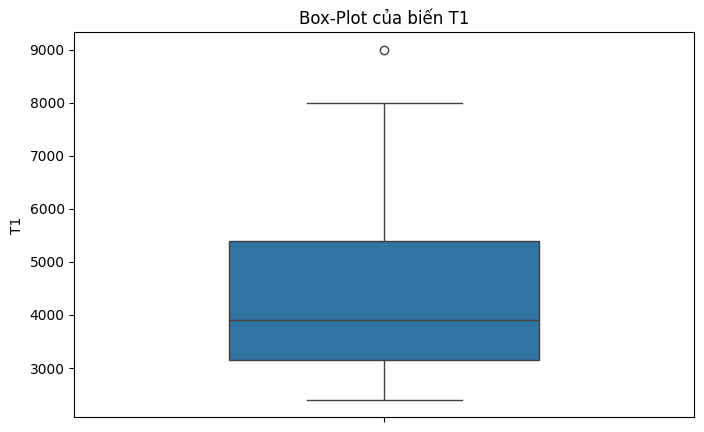

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.boxplot(y=df['T1'], width=0.5)
plt.title('Box-Plot của biến T1')
plt.show()


3Vẽ biểu đồ Histogram và mô tả hình dáng phân phối:

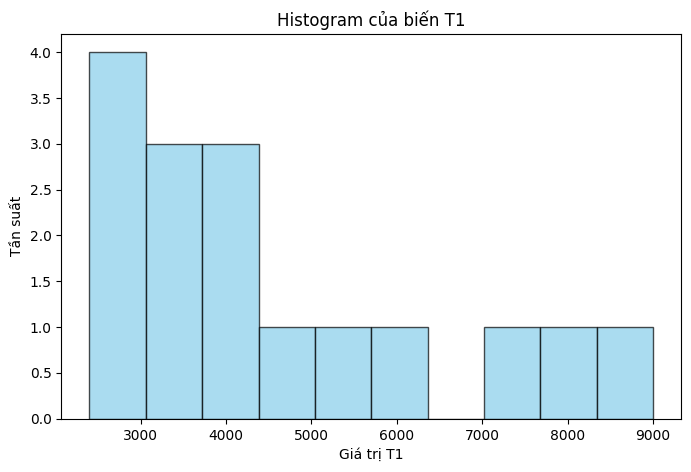

Skewness: 0.9597537113971829, Kurtosis: -0.24333309671124903


In [4]:
from scipy.stats import skew, kurtosis

plt.figure(figsize=(8, 5))
plt.hist(df['T1'], bins=10, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Histogram của biến T1')
plt.xlabel('Giá trị T1')
plt.ylabel('Tần suất')
plt.show()

# Tính skewness và kurtosis
skewness = skew(df['T1'])
kurt = kurtosis(df['T1'])
print(f'Skewness: {skewness}, Kurtosis: {kurt}')


4-Kiểm chứng phân phối chuẩn bằng QQ-Plot:



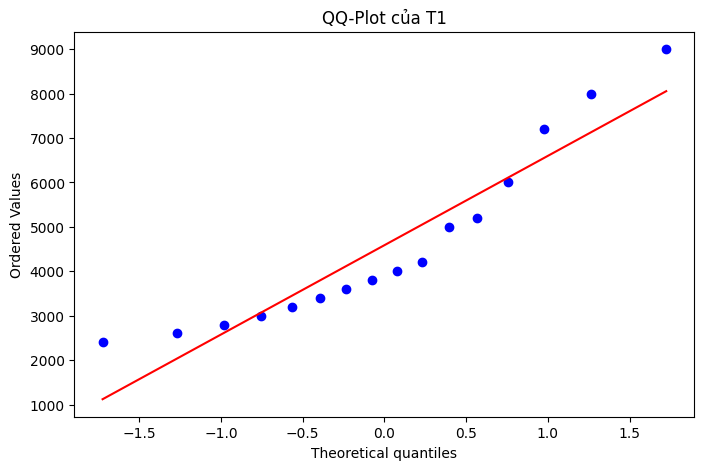

In [5]:
import scipy.stats as stats

plt.figure(figsize=(8, 5))
stats.probplot(df['T1'], dist="norm", plot=plt)
plt.title('QQ-Plot của T1')
plt.show()


Phần 2: Mô tả và khảo sát phân phối cho T1 trên từng nhóm phân lớp

C:\Users\admin\AppData\Local\Temp\ipykernel_23884\3111845714.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='phanlopT1', y='T1', data=df, palette="Set2")


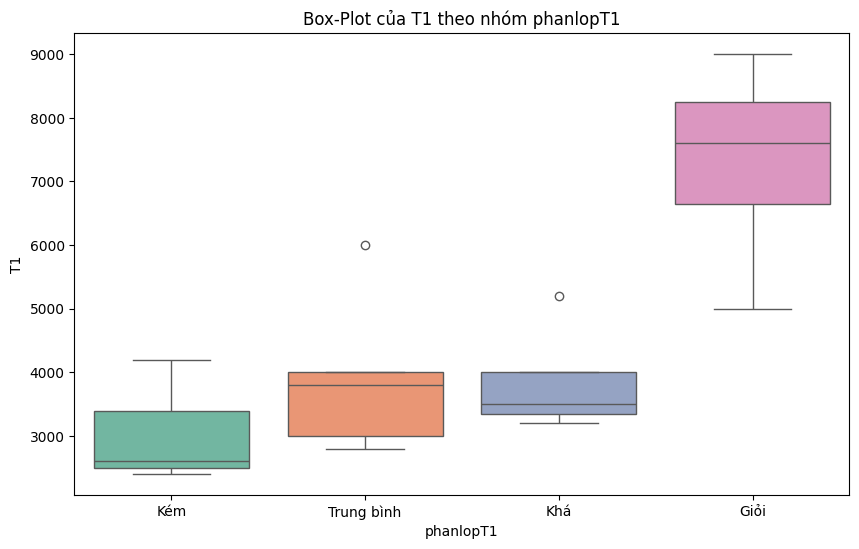

In [6]:
# Thêm dữ liệu giả định cho phân lớp
df['phanlopT1'] = ['Kém', 'Kém', 'Trung bình', 'Trung bình', 'Khá', 'Khá', 'Khá', 'Trung bình',
                   'Trung bình', 'Kém', 'Giỏi', 'Khá', 'Trung bình', 'Giỏi', 'Giỏi', 'Giỏi']

plt.figure(figsize=(10, 6))
sns.boxplot(x='phanlopT1', y='T1', data=df, palette="Set2")
plt.title('Box-Plot của T1 theo nhóm phanlopT1')
plt.show()


Histogram theo nhóm phanlopT1

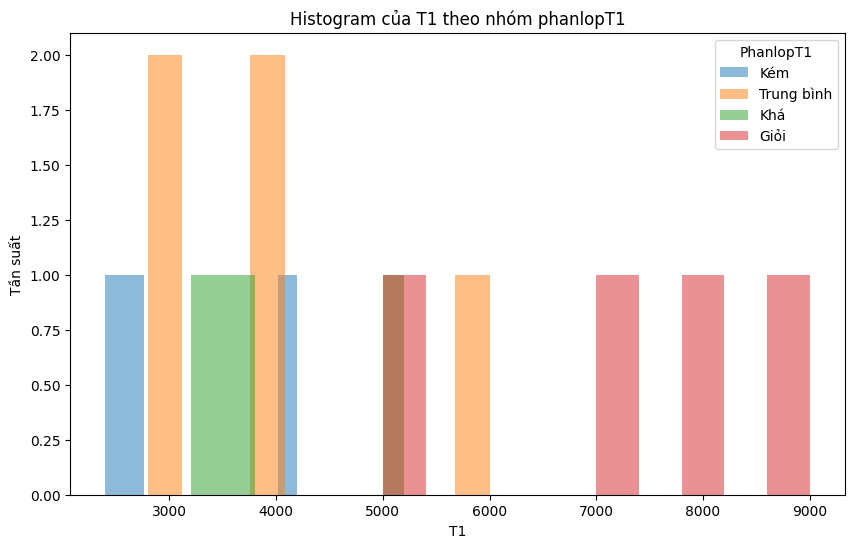

In [7]:
plt.figure(figsize=(10, 6))
for group in df['phanlopT1'].unique():
    subset = df[df['phanlopT1'] == group]
    plt.hist(subset['T1'], bins=10, alpha=0.5, label=group)

plt.title('Histogram của T1 theo nhóm phanlopT1')
plt.legend(title='PhanlopT1')
plt.xlabel('T1')
plt.ylabel('Tần suất')
plt.show()


QQ-Plot theo nhóm phanlopT1

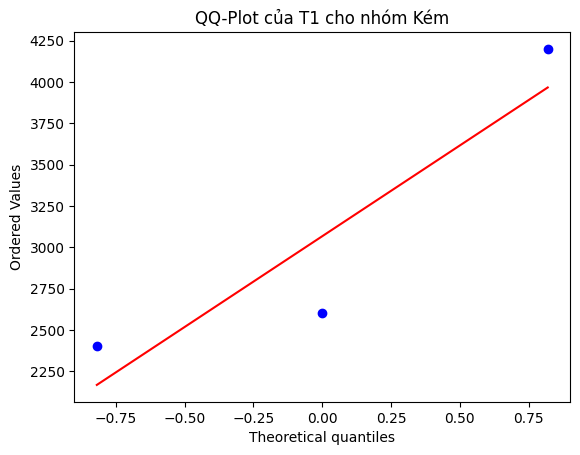

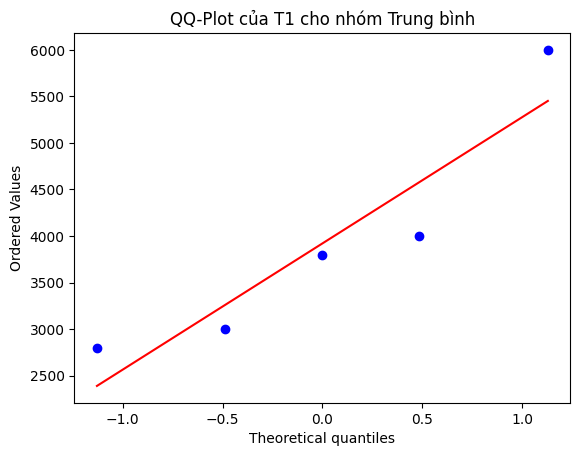

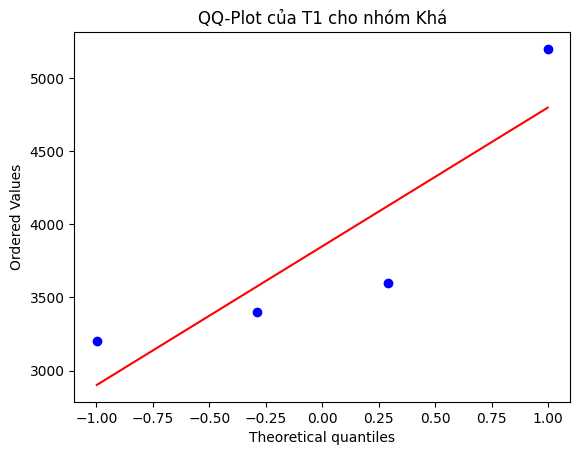

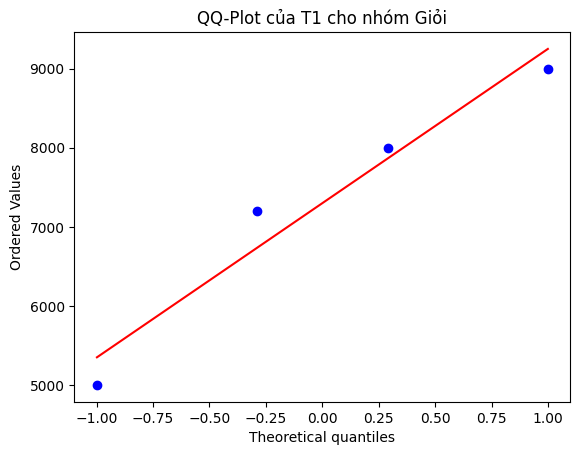

In [8]:
for group in df['phanlopT1'].unique():
    subset = df[df['phanlopT1'] == group]
    plt.figure()
    stats.probplot(subset['T1'], dist="norm", plot=plt)
    plt.title(f'QQ-Plot của T1 cho nhóm {group}')
    plt.show()


3: Khảo sát tương quan giữa DH1 và T1

Tính toán Covariance và Correlation:

In [9]:
import numpy as np

# Giả sử thêm dữ liệu DH1
df['DH1'] = [3.5, 2.8, 3.0, 4.0, 4.2, 3.9, 3.8, 3.6, 3.7, 2.5, 4.8, 4.0, 3.4, 4.5, 4.7, 4.6]

# Covariance
covariance = np.cov(df['T1'], df['DH1'])[0, 1]
# Correlation
correlation = np.corrcoef(df['T1'], df['DH1'])[0, 1]
print(f'Covariance: {covariance}, Correlation: {correlation}')


Covariance: 813.4999999999999, Correlation: 0.6015484630241961


Biểu đồ Scatter:

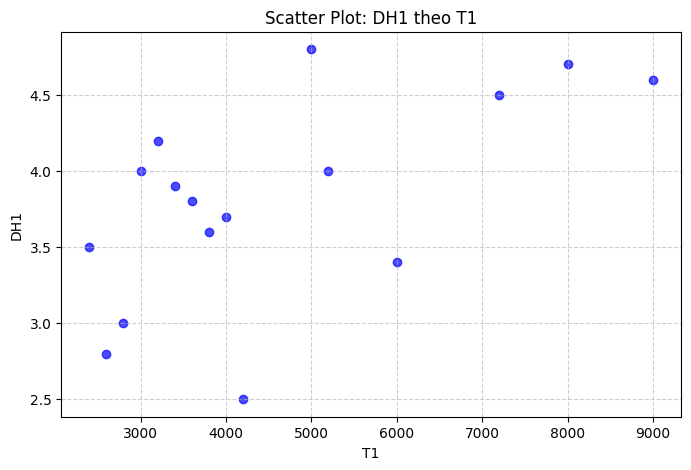

In [10]:
plt.figure(figsize=(8, 5))
plt.scatter(df['T1'], df['DH1'], color='blue', alpha=0.7)
plt.title('Scatter Plot: DH1 theo T1')
plt.xlabel('T1')
plt.ylabel('DH1')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


 Khảo sát tương quan giữa DH1, DH2, và DH3

In [11]:
df['DH2'] = [3.6, 3.0, 2.8, 4.1, 4.3, 3.7, 3.8, 3.5, 3.6, 2.6, 4.9, 4.1, 3.5, 4.4, 4.6, 4.7]
df['DH3'] = [3.7, 3.2, 3.1, 4.0, 4.4, 3.8, 3.7, 3.4, 3.7, 2.7, 4.8, 4.2, 3.6, 4.3, 4.5, 4.8]

corr_matrix = df[['DH1', 'DH2', 'DH3']].corr()
print(corr_matrix)


          DH1       DH2       DH3
DH1  1.000000  0.982548  0.964908
DH2  0.982548  1.000000  0.985858
DH3  0.964908  0.985858  1.000000


Scatter Plot giữa các biến

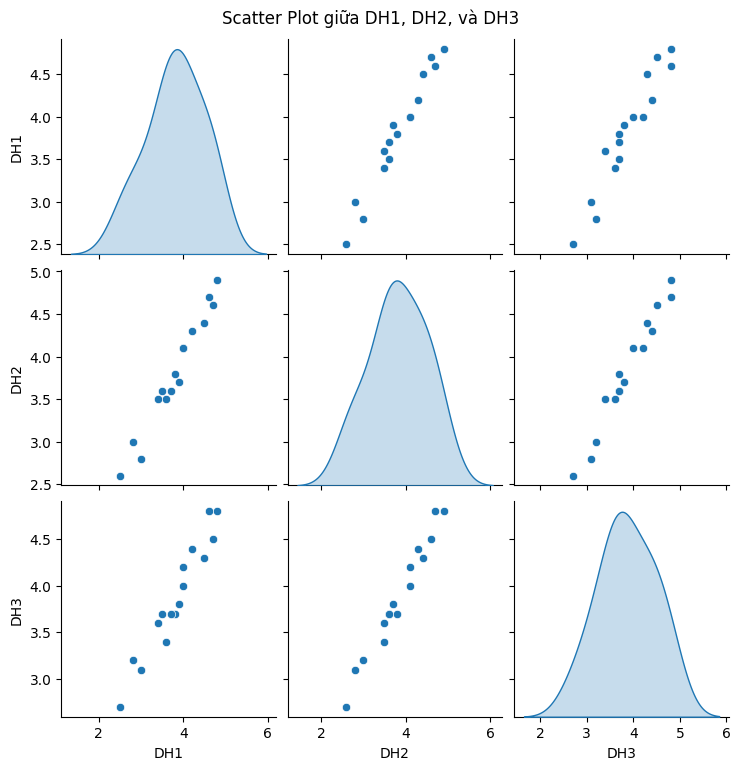

In [12]:
sns.pairplot(df[['DH1', 'DH2', 'DH3']], diag_kind='kde')
plt.suptitle('Scatter Plot giữa DH1, DH2, và DH3', y=1.02)
plt.show()
